# Titanic Tragedy Survivors Exploratory Data Analysis
<br>-Uday Kumar S

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as ply

## Loading the data

In [2]:
titanic=pd.read_csv('/Users/rogudays/Documents/GitHub/JupyterNotebooks/Adverk-Artificial_Intelligence/titanic/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We have null values in Age, Cabin, Embarked columns

### The list consists of 890 passengers of the titanic

We dont need PassengerId as it is same as the index

In [4]:
titanic.drop(columns="PassengerId", inplace=True)
titanic.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0,B42,S


## Lets see the number of passengers who survived

For Simplicity lets convert the Survived:
<br> 0 to no
<br> 1 to yes

In [5]:
titanic['Survived']=titanic['Survived'].map({0:'no',1:'yes'})
titanic['Survived'].value_counts()

Survived
no     549
yes    342
Name: count, dtype: int64

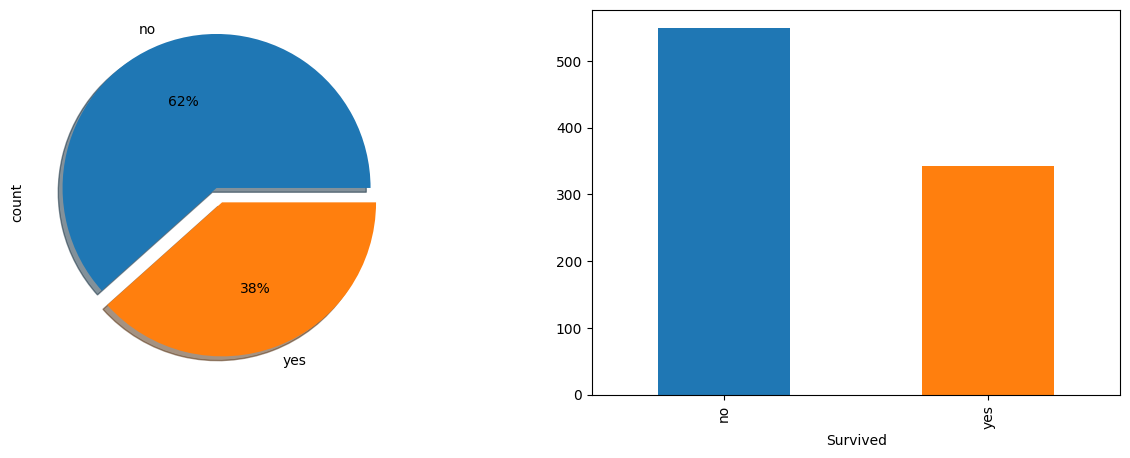

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
titanic['Survived'].value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0], shadow=True)
titanic['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.show()

With the help of the above graph we can see that only 38% (342 of 890) of the total passesnger list survived the titanic shipwreck and about 62% (549 of 890) did not survive the shipwreck

## Lets see the if there is any relation between the survival of the passenger with the Ticket Class

Lets chech how many passengers are there in each class of tickets
<br>lets convert these integers to category 
<br>we have,
<br>1 for Upper Class
<br>2 for Middle Class
<br>3 for Lower Class

In [7]:
titanic['Pclass']=titanic['Pclass'].map({1:'Upper Class', 2:'Middle Class', 3:'Lower Class'})

In [8]:
titanic['Pclass'].value_counts()

Pclass
Lower Class     491
Upper Class     216
Middle Class    184
Name: count, dtype: int64

### Multivariate Analysis Ticket class vs Survival

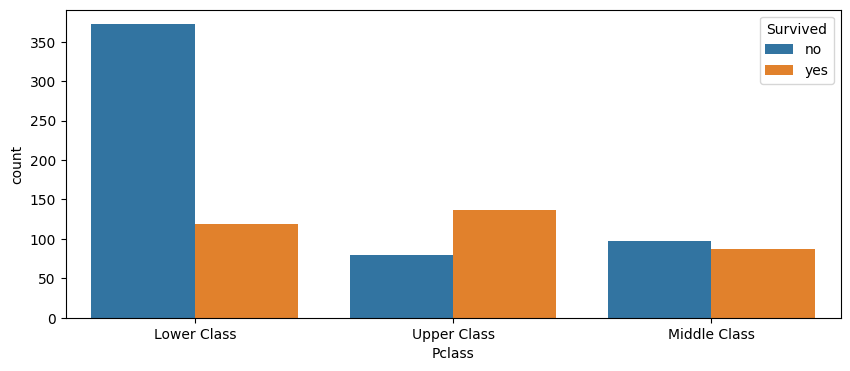

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(x=titanic['Pclass'], hue=titanic['Survived'], data=titanic)
plt.show()

The above graph lets us visualise the count of number of passsengers survival in each ticket class

Survived
yes    136
no      80
Name: count, dtype: int64


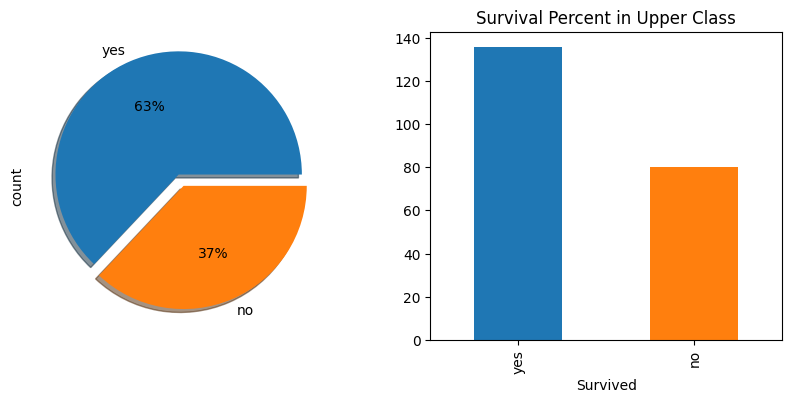

In [10]:
survived_upper=titanic.loc[(titanic["Pclass"]=='Upper Class')]
upper=survived_upper['Survived']
print(upper.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
upper.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
survived_upper['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent in Upper Class')
plt.show()

From the above graphs we can see that about 63% of peole in Upper Class survived the shipwreck

Survived
no     97
yes    87
Name: count, dtype: int64


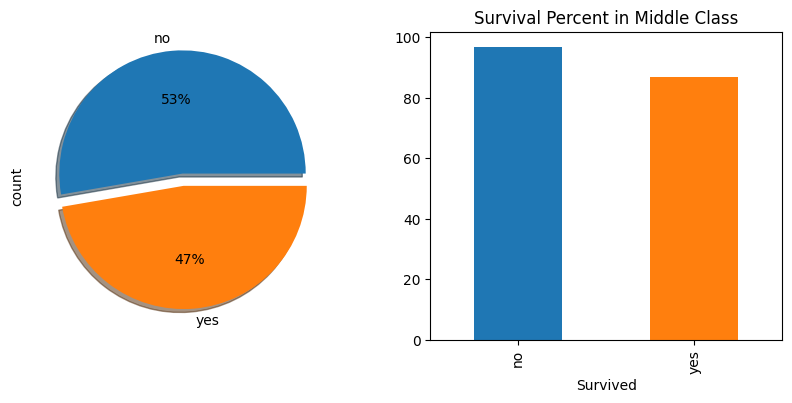

In [11]:
survived_middle=titanic.loc[(titanic["Pclass"]=='Middle Class')]
middle=survived_middle['Survived']
print(middle.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
middle.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
survived_middle['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent in Middle Class')
plt.show()

We can see that around 47% of the people in Middle Class survived the wreck

Survived
no     372
yes    119
Name: count, dtype: int64


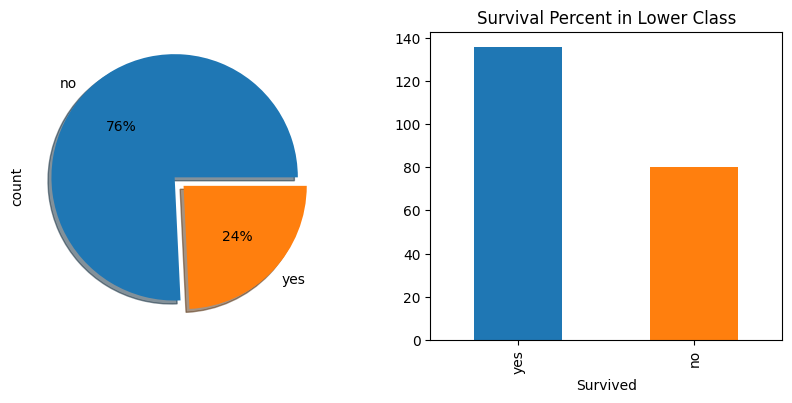

In [12]:
survived_lower=titanic.loc[(titanic["Pclass"]=='Lower Class')]
lower=survived_lower['Survived']
print(lower.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
lower.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
survived_upper['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent in Lower Class')
plt.show()

From the above graphs we can see that only about 24% of peole in Lower Class survived the shipwreck

In [13]:
(63+53)/2

58.0

Analysing all the above graphs we can say that people in the Upper or Middle class have an 58% percent chance at survival

## Lets see the if there is any relation between the survival of the passenger with the Gender of the Passenger

In [14]:
titanic['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Lets see the number of Male Survivors

Survived
no     468
yes    109
Name: count, dtype: int64


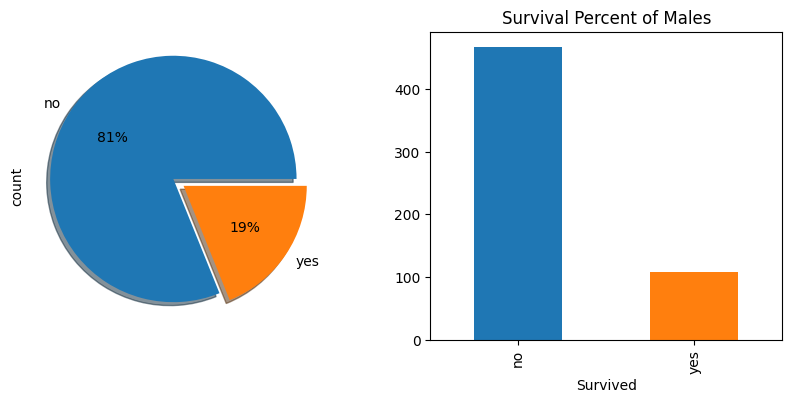

In [15]:
male=titanic.loc[(titanic["Sex"]=='male')]
male_survived=male['Survived']
print(male_survived.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
male_survived.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
male['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent of Males')
plt.show()

Only 19% of the male survived the titanic shipwreck

### Lets see the number of female Survivors

Survived
yes    233
no      81
Name: count, dtype: int64


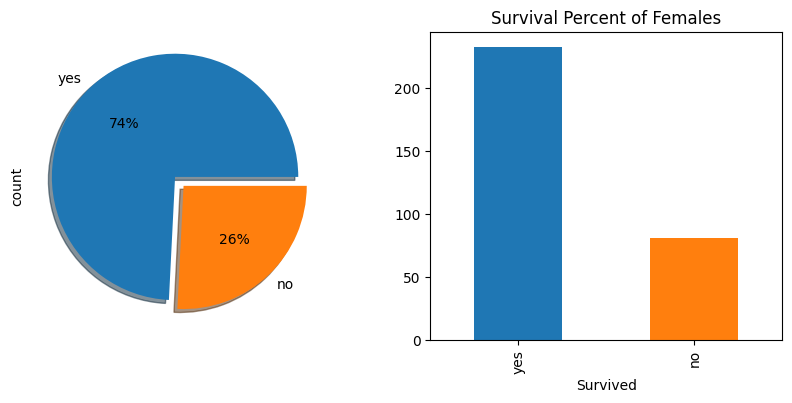

In [16]:
female=titanic.loc[(titanic["Sex"]=='female')]
female_survived=female['Survived']
print(female_survived.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
female_survived.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
female['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent of Females')
plt.show()

About 74% of the females survived the shipwreck

### lets see the Age group of the survived group

In [17]:
titanic.describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [18]:
titanic=titanic.fillna(29)

/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/y6/tg3ky1r5433dpknrjdxlq8880000gn/T/ipykernel_72552/318515279.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

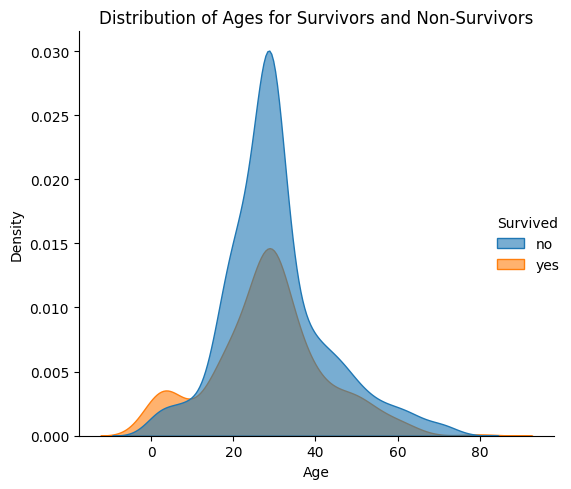

In [19]:
plt.figure(figsize=(10, 5))
sns.displot(data=titanic, x='Age', hue='Survived', kind='kde', fill=True, alpha=0.6)
plt.title('Distribution of Ages for Survivors and Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


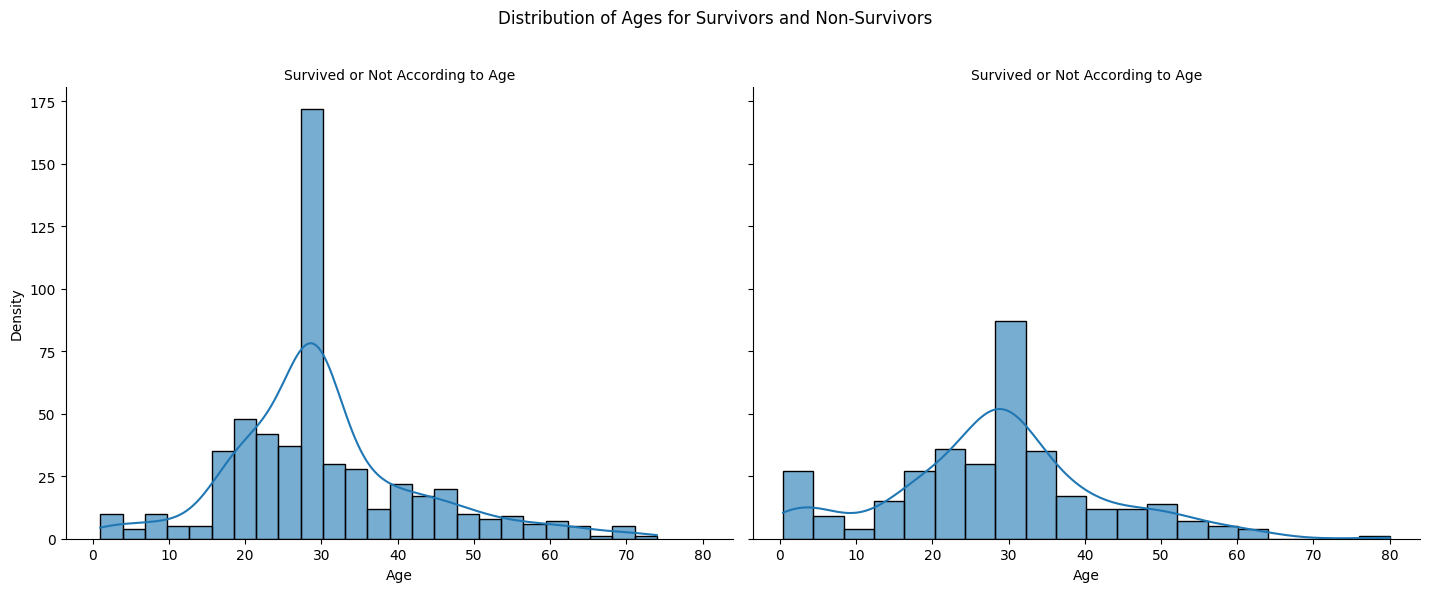

In [20]:
age = sns.FacetGrid(titanic, col='Survived', height=6, aspect=1.2)
age.map(sns.histplot, 'Age', kde=True, fill=True, alpha=0.6)
age.set_titles(col_template="Survived or Not According to Age")
age.set_axis_labels('Age', 'Density')
plt.subplots_adjust(top=0.85)
age.fig.suptitle('Distribution of Ages for Survivors and Non-Survivors')
plt.show()

We can see that the younger age group where age less than 20 a lot more passengers have survived
<br>but Passengers who have are between 20 and 40 years of age a lot have died.
<br>thats the over analyis from the chart because of overlapping in most age instances

### lets see the SibSp group of the survived group

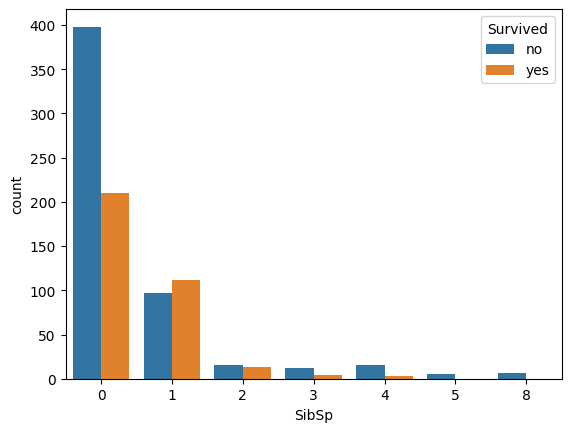

In [21]:
sns.countplot(x=titanic['SibSp'], hue=titanic['Survived'], data=titanic)
plt.show()

We can see that passengers with 0 siblings many died and also with more sibling also died

### lets see the Parch group of the survived group

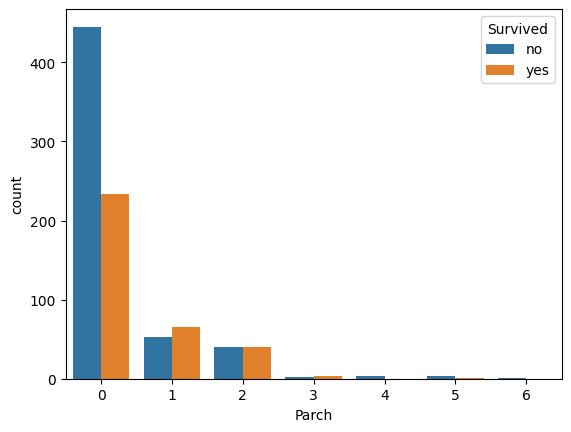

In [22]:
sns.countplot(x=titanic['Parch'], hue=titanic['Survived'], data=titanic)
plt.show()

### lets see the Fare price of the survived group

/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/y6/tg3ky1r5433dpknrjdxlq8880000gn/T/ipykernel_72552/92610542.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

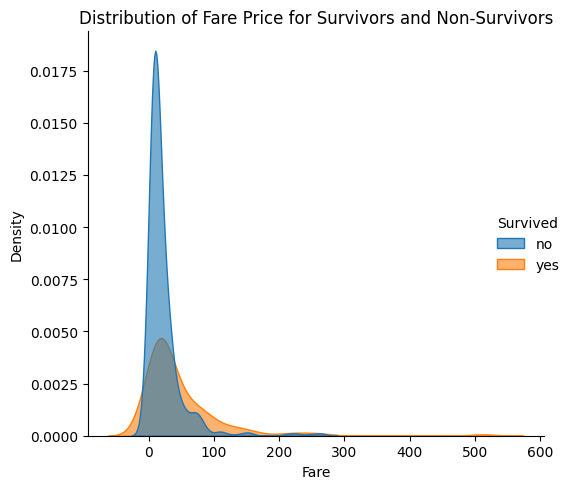

In [23]:
plt.figure(figsize=(10, 5))
sns.displot(data=titanic, x='Fare', hue='Survived', kind='kde', fill=True, alpha=0.6)
plt.title('Distribution of Fare Price for Survivors and Non-Survivors')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.tight_layout()
plt.show()

/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


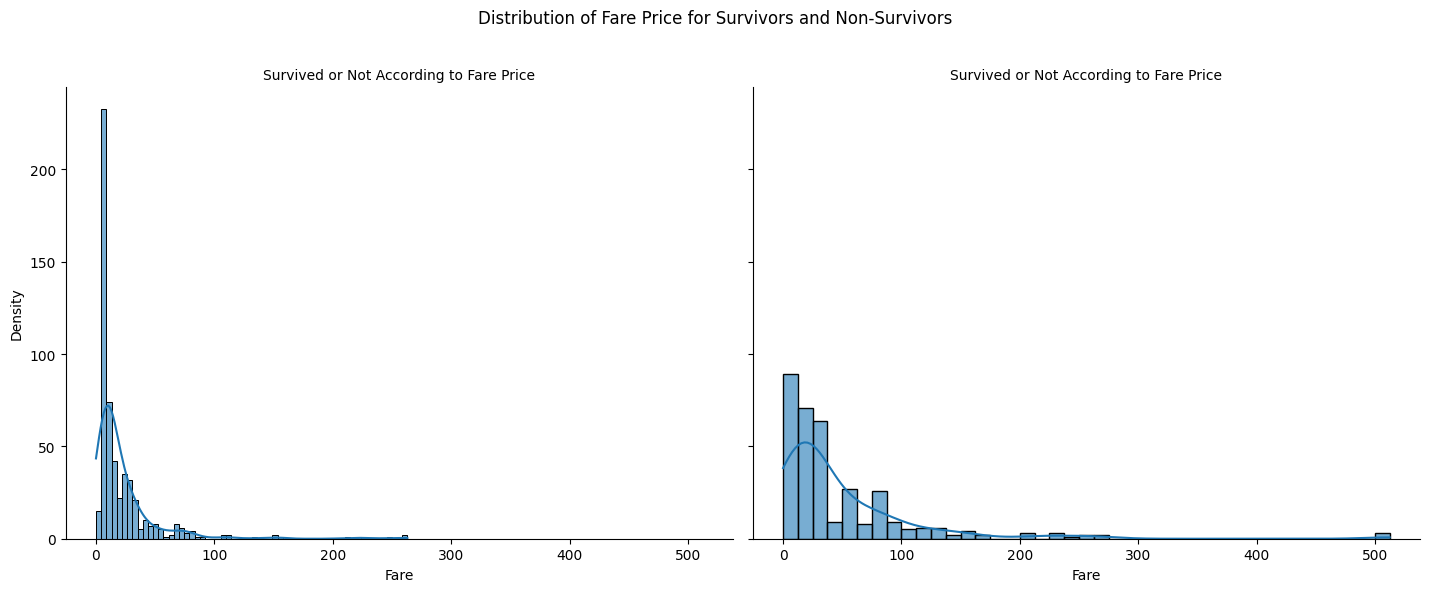

In [24]:
fare = sns.FacetGrid(titanic, col='Survived', height=6, aspect=1.2)
fare.map(sns.histplot, 'Fare', kde=True, fill=True, alpha=0.6)
fare.set_titles(col_template="Survived or Not According to Fare Price")
fare.set_axis_labels('Fare', 'Density')
plt.subplots_adjust(top=0.85)
fare.fig.suptitle('Distribution of Fare Price for Survivors and Non-Survivors')
plt.show()

We can clearly see that passengers who have paid a higher ticket fare had better chances of surviving as these were the VIP clubs and given preference over ordinary people.

### lets see the Embarked place of the survived group

Survived
yes    93
no     75
Name: count, dtype: int64


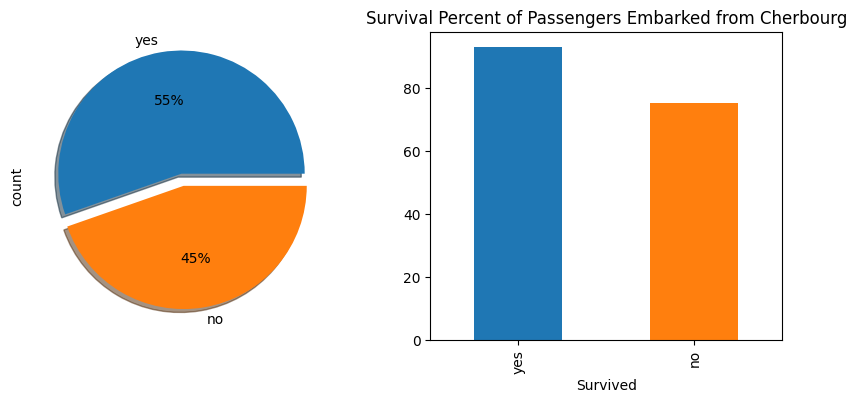

In [25]:
cherbourg=titanic.loc[(titanic["Embarked"]=='C')]
cherbourg_survived=cherbourg['Survived']
print(cherbourg_survived.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
cherbourg_survived.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
cherbourg['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent of Passengers Embarked from Cherbourg')
plt.show()

Passengers who embarked their journery from Cherbourg about 55%(93 of 168) Survived the shipwreck

Survived
no     47
yes    30
Name: count, dtype: int64


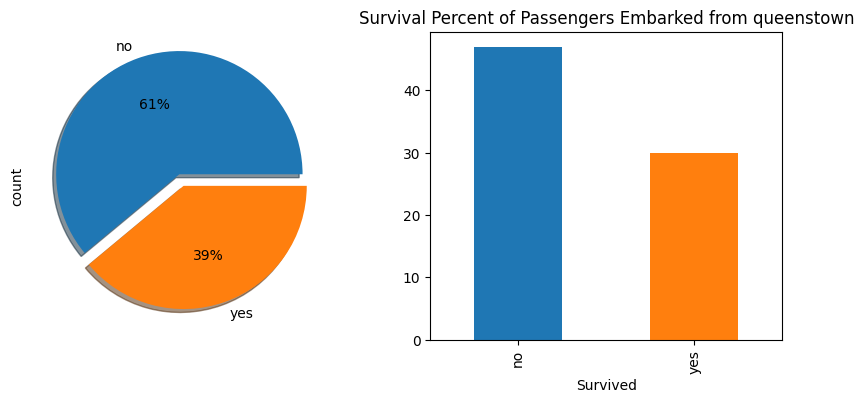

In [26]:
queenstown=titanic.loc[(titanic["Embarked"]=='Q')]
queenstown_survived=queenstown['Survived']
print(queenstown_survived.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
queenstown_survived.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
queenstown['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent of Passengers Embarked from queenstown')
plt.show()

Passengers who embarked their journery from Queenstown about 39%(30 of 77) Survived the shipwreck

Survived
no     427
yes    217
Name: count, dtype: int64


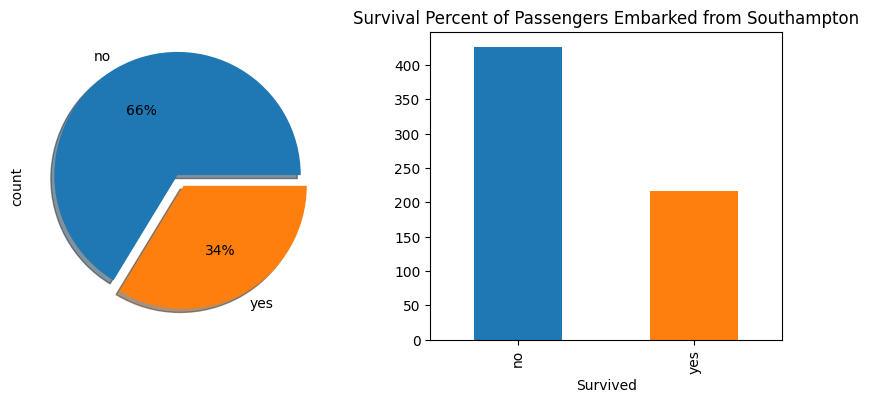

In [27]:
southampton=titanic.loc[(titanic["Embarked"]=='S')]
southampton_survived=southampton['Survived']
print(southampton_survived.value_counts())
fig, axes = plt.subplots(1,2, figsize=(10,4))
southampton_survived.value_counts().plot.pie(explode=[0.1,0], autopct='%1.0f%%', ax=axes[0],shadow=True)
southampton['Survived'].value_counts().plot.bar( color=['#1f77b4','#ff7f0e'])
plt.title('Survival Percent of Passengers Embarked from Southampton')
plt.show()

Passengers who embarked their journery from Southampton only about 34%(217 of 644) Survived the shipwreck
<br>Majority of the Passengers came from Southampton

## Bivariate Analysis

/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/new_python/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


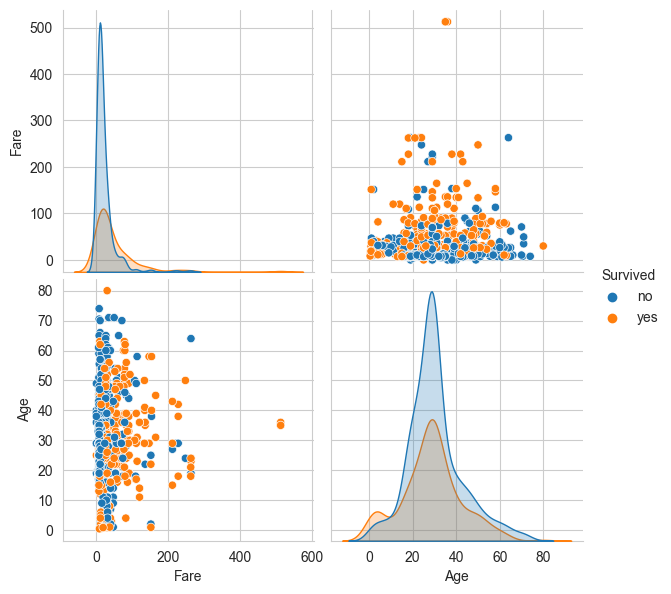

In [28]:
sns.set_style("whitegrid");
sns.pairplot(titanic[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

We can see the same conclusion seen from the above univariate analsyis